In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df_test = pd.read_csv('test.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)
df_test.drop(['Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [5]:
df_num = df.select_dtypes(exclude='object')
df_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


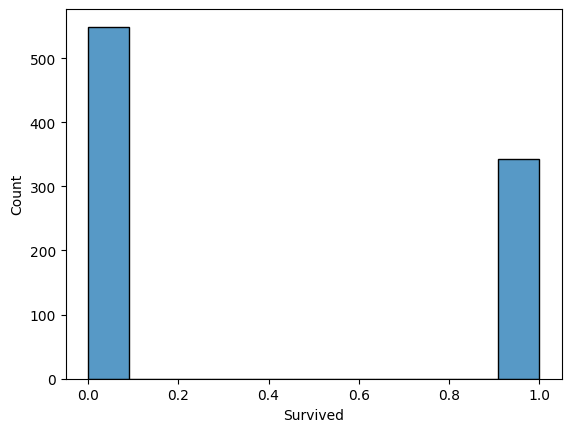

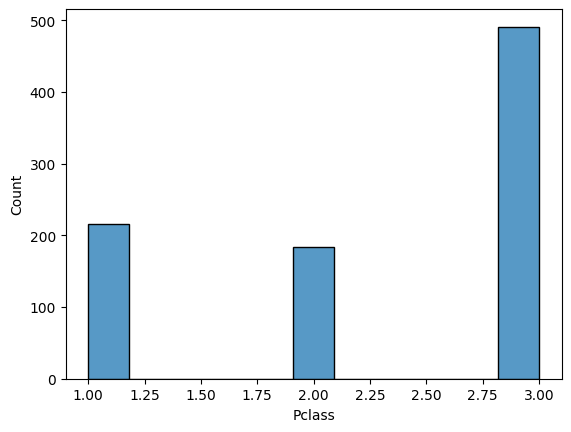

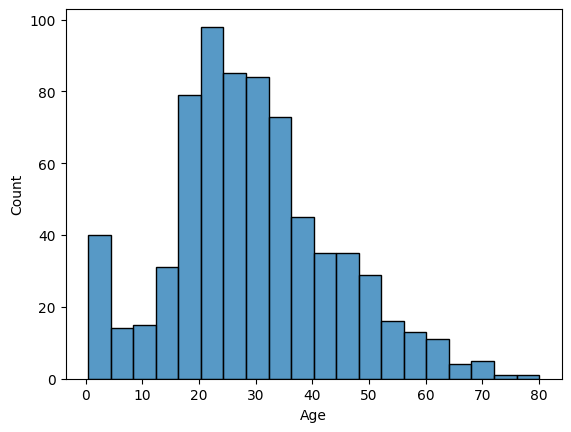

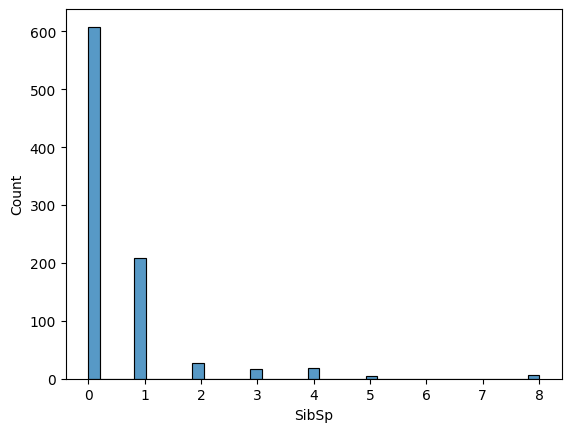

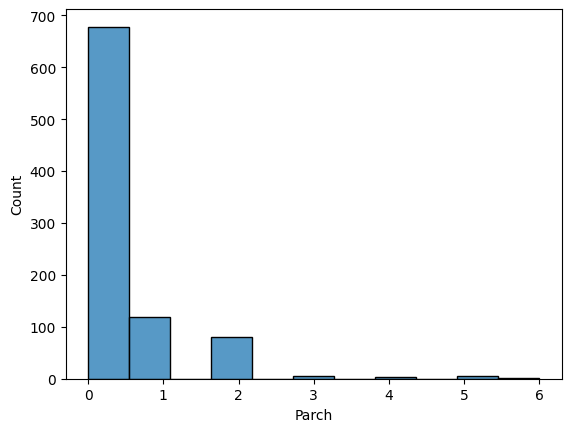

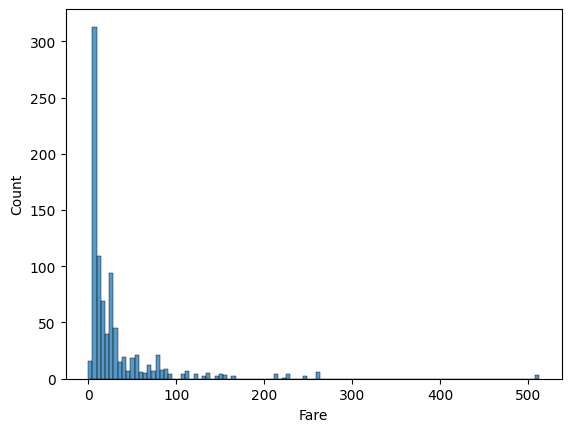

In [6]:
for col in df_num.columns:
    sns.histplot(df_num[col])
    plt.show()

In [7]:
pd.pivot_table(df, index='Survived', values=['Age', 'Fare'], aggfunc='mean')

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


In [8]:
pd.pivot_table(df, index='Survived', columns='Pclass', values='Fare', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [9]:
pd.pivot_table(df, index='Survived',columns='Parch' ,values='Fare', aggfunc='count')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


In [10]:
pd.pivot_table(df, index='Survived',columns='SibSp' ,values='Fare', aggfunc='count')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


In [11]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,Sex,Cabin,Embarked
PassengerId,,,
1,male,NaN,S
2,female,C85,C
3,female,NaN,S
4,female,C123,S
5,male,NaN,S


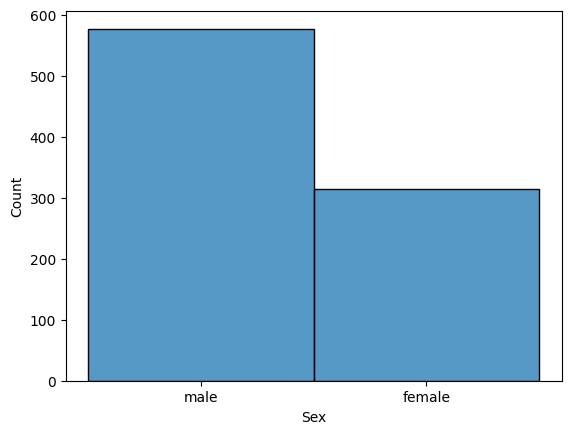

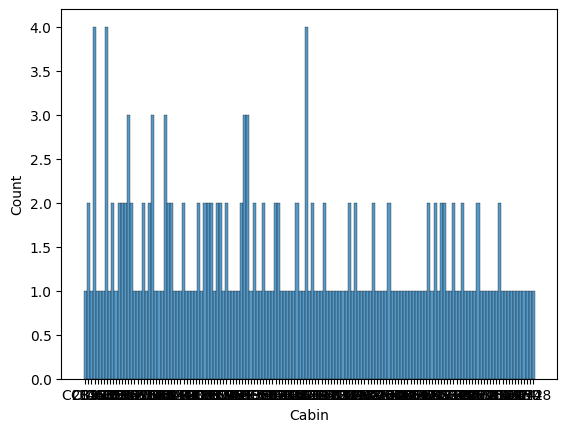

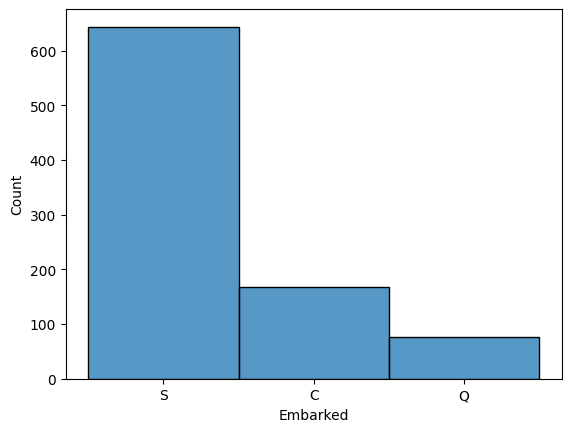

In [12]:
for col in df_cat.columns:
    sns.histplot(df_cat[col])
    plt.show()

In [13]:
pd.pivot_table(df, index='Survived', columns=[ 'Sex'], values='Fare' , aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [14]:
pd.pivot_table(df, index='Survived', columns=[ 'Embarked'], values='Fare' , aggfunc='count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [15]:
df_cat['Cabin'] = df_cat['Cabin'].str[0]
df_cat.head()

,Sex,Cabin,Embarked
PassengerId,,,
1,male,NaN,S
2,female,C,C
3,female,NaN,S
4,female,C,S
5,male,NaN,S


In [16]:
df['Cabin'] = df['Cabin'].str[0]

In [17]:
pd.pivot_table(df, index='Survived', columns=[ 'Cabin'], values='Fare' , aggfunc='count')

Cabin,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [19]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('N', inplace=True)

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,N,S
2,1,1,female,38.000000,1,0,71.2833,C,C
3,1,3,female,26.000000,0,0,7.9250,N,S
4,1,1,female,35.000000,1,0,53.1000,C,S
5,0,3,male,35.000000,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,N,S
888,1,1,female,19.000000,0,0,30.0000,B,S
889,0,3,female,29.699118,1,2,23.4500,N,S


In [21]:
enc = OneHotEncoder()
x = pd.DataFrame(enc.fit_transform(df[['Embarked', 'Sex']]).toarray(), index=df.index, columns=enc.get_feature_names_out())
x

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,
1,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0
5,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
887,0.0,0.0,1.0,0.0,1.0
888,0.0,0.0,1.0,1.0,0.0
889,0.0,0.0,1.0,1.0,0.0


In [22]:
# encode categorical feature columns into one-hot encoded columns
df = pd.concat([df, x], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,N,S,0.0,0.0,1.0,0.0,1.0
2,1,1,female,38.000000,1,0,71.2833,C,C,1.0,0.0,0.0,1.0,0.0
3,1,3,female,26.000000,0,0,7.9250,N,S,0.0,0.0,1.0,1.0,0.0
4,1,1,female,35.000000,1,0,53.1000,C,S,0.0,0.0,1.0,1.0,0.0
5,0,3,male,35.000000,0,0,8.0500,N,S,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,N,S,0.0,0.0,1.0,0.0,1.0
888,1,1,female,19.000000,0,0,30.0000,B,S,0.0,0.0,1.0,1.0,0.0
889,0,3,female,29.699118,1,2,23.4500,N,S,0.0,0.0,1.0,1.0,0.0


In [23]:
enc = OrdinalEncoder()
x = pd.DataFrame(enc.fit_transform(df[['Cabin']]), index=df.index, columns=['Cabin_ordinal'])
x

,Cabin_ordinal
PassengerId,
1,7.0
2,2.0
3,7.0
4,2.0
5,7.0
...,...
887,7.0
888,1.0
889,7.0


In [24]:
df = pd.concat([df, x], axis=1)

In [25]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_ordinal
PassengerId,,,,,,,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,N,S,0.0,0.0,1.0,0.0,1.0,7.0
2,1,1,female,38.000000,1,0,71.2833,C,C,1.0,0.0,0.0,1.0,0.0,2.0
3,1,3,female,26.000000,0,0,7.9250,N,S,0.0,0.0,1.0,1.0,0.0,7.0
4,1,1,female,35.000000,1,0,53.1000,C,S,0.0,0.0,1.0,1.0,0.0,2.0
5,0,3,male,35.000000,0,0,8.0500,N,S,0.0,0.0,1.0,0.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,N,S,0.0,0.0,1.0,0.0,1.0,7.0
888,1,1,female,19.000000,0,0,30.0000,B,S,0.0,0.0,1.0,1.0,0.0,1.0
889,0,3,female,29.699118,1,2,23.4500,N,S,0.0,0.0,1.0,1.0,0.0,7.0


In [26]:
df.drop(['Cabin', 'Embarked', 'Sex'], axis=1, inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_ordinal
PassengerId,,,,,,,,,,,,
1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,7.0
2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,2.0
3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,7.0
4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0,2.0
5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0,7.0
888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0,1.0
889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0,7.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Age            891 non-null    float64
 3   SibSp          891 non-null    int64  
 4   Parch          891 non-null    int64  
 5   Fare           891 non-null    float64
 6   Embarked_C     891 non-null    float64
 7   Embarked_Q     891 non-null    float64
 8   Embarked_S     891 non-null    float64
 9   Sex_female     891 non-null    float64
 10  Sex_male       891 non-null    float64
 11  Cabin_ordinal  891 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 90.5 KB


In [29]:
df['Embarked_C'] = df['Embarked_C'].astype(bool)
df['Embarked_Q'] = df['Embarked_Q'].astype(bool)
df['Embarked_S'] = df['Embarked_S'].astype(bool)

df['Sex_female'] = df['Sex_female'].astype(bool)
df['Sex_male'] = df['Sex_male'].astype(bool)

df['Cabin_ordinal'] = df['Cabin_ordinal'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Age            891 non-null    float64
 3   SibSp          891 non-null    int64  
 4   Parch          891 non-null    int64  
 5   Fare           891 non-null    float64
 6   Embarked_C     891 non-null    bool   
 7   Embarked_Q     891 non-null    bool   
 8   Embarked_S     891 non-null    bool   
 9   Sex_female     891 non-null    bool   
 10  Sex_male       891 non-null    bool   
 11  Cabin_ordinal  891 non-null    int32  
dtypes: bool(5), float64(2), int32(1), int64(4)
memory usage: 56.6 KB


In [30]:
# create a random forest classifier
rf = RandomForestClassifier()
rf.fit(df.drop('Survived', axis=1), df['Survived'])

# create a xgboost classifier
xgb = xgb.XGBClassifier()
xgb.fit(df.drop('Survived', axis=1), df['Survived'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [31]:
# check the accuracy of the random forest classifier
rf.score(df.drop('Survived', axis=1), df['Survived'])

0.9865319865319865

In [32]:
# check the accuracy of the xgboost classifier
xgb.score(df.drop('Survived', axis=1), df['Survived'])

0.9674523007856342

In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.4+ KB


In [36]:
# process the test data
df_test['Age'].fillna(df['Age'].mean(), inplace=True)
df_test['Fare'].fillna(df['Fare'].mean(), inplace=True)
df_test['Cabin'].fillna('N', inplace=True)

df_test['Cabin'] = df_test['Cabin'].str[0]

enc = OneHotEncoder()

x = pd.DataFrame
x = pd.DataFrame(enc.fit_transform(df_test[['Embarked', 'Sex']]).toarray(), index=df_test.index, columns=enc.get_feature_names_out())
x

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,
892,0.0,1.0,0.0,0.0,1.0
893,0.0,0.0,1.0,1.0,0.0
894,0.0,1.0,0.0,0.0,1.0
895,0.0,0.0,1.0,0.0,1.0
896,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
1305,0.0,0.0,1.0,0.0,1.0
1306,1.0,0.0,0.0,1.0,0.0
1307,0.0,0.0,1.0,0.0,1.0


In [37]:
df_test = pd.concat([df_test, x], axis=1)
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,
892,3,male,34.500000,0,0,7.8292,N,Q,0.0,1.0,0.0,0.0,1.0
893,3,female,47.000000,1,0,7.0000,N,S,0.0,0.0,1.0,1.0,0.0
894,2,male,62.000000,0,0,9.6875,N,Q,0.0,1.0,0.0,0.0,1.0
895,3,male,27.000000,0,0,8.6625,N,S,0.0,0.0,1.0,0.0,1.0
896,3,female,22.000000,1,1,12.2875,N,S,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,male,29.699118,0,0,8.0500,N,S,0.0,0.0,1.0,0.0,1.0
1306,1,female,39.000000,0,0,108.9000,C,C,1.0,0.0,0.0,1.0,0.0
1307,3,male,38.500000,0,0,7.2500,N,S,0.0,0.0,1.0,0.0,1.0


In [38]:
enc = OrdinalEncoder()
x = pd.DataFrame(enc.fit_transform(df_test[['Cabin']]), index=df_test.index, columns=['Cabin_ordinal'])
x

,Cabin_ordinal
PassengerId,
892,7.0
893,7.0
894,7.0
895,7.0
896,7.0
...,...
1305,7.0
1306,2.0
1307,7.0


In [39]:
df_test = pd.concat([df_test, x], axis=1)
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_ordinal
PassengerId,,,,,,,,,,,,,,
892,3,male,34.500000,0,0,7.8292,N,Q,0.0,1.0,0.0,0.0,1.0,7.0
893,3,female,47.000000,1,0,7.0000,N,S,0.0,0.0,1.0,1.0,0.0,7.0
894,2,male,62.000000,0,0,9.6875,N,Q,0.0,1.0,0.0,0.0,1.0,7.0
895,3,male,27.000000,0,0,8.6625,N,S,0.0,0.0,1.0,0.0,1.0,7.0
896,3,female,22.000000,1,1,12.2875,N,S,0.0,0.0,1.0,1.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,male,29.699118,0,0,8.0500,N,S,0.0,0.0,1.0,0.0,1.0,7.0
1306,1,female,39.000000,0,0,108.9000,C,C,1.0,0.0,0.0,1.0,0.0,2.0
1307,3,male,38.500000,0,0,7.2500,N,S,0.0,0.0,1.0,0.0,1.0,7.0


In [40]:
df_test.drop(['Cabin', 'Embarked', 'Sex'], axis=1, inplace=True)
df_test

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_ordinal
PassengerId,,,,,,,,,,,
892,3,34.500000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0,7.0
893,3,47.000000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0,7.0
894,2,62.000000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0,7.0
895,3,27.000000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0,7.0
896,3,22.000000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,29.699118,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,7.0
1306,1,39.000000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0,2.0
1307,3,38.500000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0,7.0


In [41]:
df_test['Embarked_C'] = df_test['Embarked_C'].astype(bool)
df_test['Embarked_Q'] = df_test['Embarked_Q'].astype(bool)
df_test['Embarked_S'] = df_test['Embarked_S'].astype(bool)

df_test['Sex_female'] = df_test['Sex_female'].astype(bool)
df_test['Sex_male'] = df_test['Sex_male'].astype(bool)

df_test['Cabin_ordinal'] = df_test['Cabin_ordinal'].astype(int)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Age            418 non-null    float64
 2   SibSp          418 non-null    int64  
 3   Parch          418 non-null    int64  
 4   Fare           418 non-null    float64
 5   Embarked_C     418 non-null    bool   
 6   Embarked_Q     418 non-null    bool   
 7   Embarked_S     418 non-null    bool   
 8   Sex_female     418 non-null    bool   
 9   Sex_male       418 non-null    bool   
 10  Cabin_ordinal  418 non-null    int32  
dtypes: bool(5), float64(2), int32(1), int64(3)
memory usage: 23.3 KB


In [42]:
# predict the survival of the passengers in the test data
rf_pred = rf.predict(df_test)
xgb_pred = xgb.predict(df_test)

# create a submission file
submission = pd.DataFrame({'PassengerId': df_test.index, 'Survived': rf_pred})
submission.to_csv('submission_rf.csv', index=False)

submission = pd.DataFrame({'PassengerId': df_test.index, 'Survived': xgb_pred})
submission.to_csv('submission_xgb.csv', index=False)